In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Data on Supervised learning using SVM And FSVM

In [21]:
df = pd.read_csv('citrus.csv') 
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [22]:
#label
df['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

In [23]:
# All data are numbers there is no null or missed values
df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [24]:
print(df.describe())

           diameter        weight           red         green          blue
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean       9.975685    175.050792    153.847800     76.010600     11.363200
std        1.947844     29.212119     10.432954     11.708433      9.061275
min        2.960000     86.760000    115.000000     31.000000      2.000000
25%        8.460000    152.220000    147.000000     68.000000      2.000000
50%        9.980000    174.985000    154.000000     76.000000     10.000000
75%       11.480000    197.722500    161.000000     84.000000     17.000000
max       16.450000    261.510000    192.000000    116.000000     56.000000


<AxesSubplot:xlabel='name', ylabel='count'>

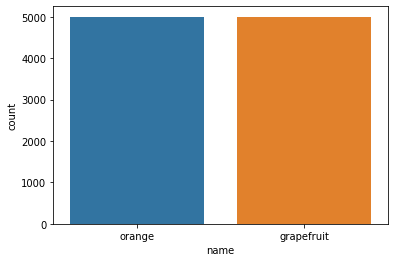

In [25]:
sns.countplot(x = "name", data = df)

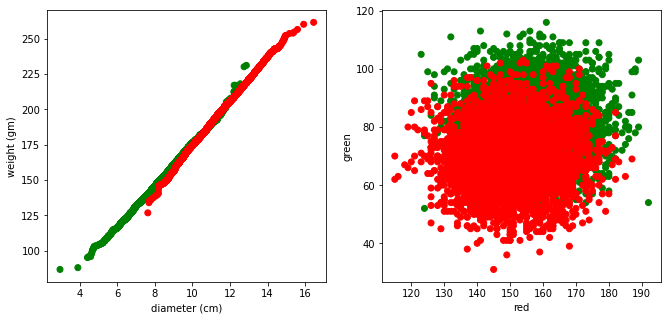

In [26]:
data_colors = ['green' if x=='orange' else 'red' for x in df.name]

_, ax = plt.subplots(1, 2, figsize=(11,5))

ax[0].scatter(df.diameter, df.weight, c=data_colors)
ax[0].set(xlabel='diameter (cm)', ylabel='weight (gm)')

ax[1].scatter(df.red, df.green, c=data_colors)
ax[1].set(xlabel='red', ylabel='green')
plt.show()

In [27]:
features = df.drop(['name'], axis = 1)
labels = df['name']

In [28]:
# encode labels from names to numbers
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)

In [29]:
# scale the features to [0-1] scale
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [30]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [31]:
features


array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [33]:
#Defining a sigmoid function
def sigmoid(z):
    op = 1/(1 + np.exp(-z)) 
    return op

In [34]:
#Loss Function
 
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [35]:
#Gradient_descent
 
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

In [36]:
#import required modules
import numpy as np
 
class LogisticRegression:
    def __init__(self,x,y):      
        self.intercept = np.ones((x.shape[0], 1))  
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y
         
    #Sigmoid method
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))
     
    #method to calculate the Loss
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
     
    #Method for calculating the gradients
    def gradient_descent(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]
 
     
    def fit(self, lr , iterations):
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
             
            loss = self.loss(sigma,self.y)
 
            dW = self.gradient_descent(self.x , sigma, self.y)
             
            #Updating the weights
            self.weight -= lr * dW
 
        return print('fitted successfully to data')
     
    #Method to predict the class label.
    def predict(self, x_new , treshold):
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        result = self.sigmoid(x_new, self.weight)
        result = result >= treshold
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] == True: 
                y_pred[i] = 1
            else:
                continue
                 
        return y_pred

In [37]:
from sklearn.datasets import load_breast_cancer
 

#creating the class Object
regressor = LogisticRegression(X_train,y_train)
 
regressor.fit(0.1 , 5000)
y_pred = regressor.predict(X_train,0.5)
print('accuracy -> {}'.format(sum(y_pred == y_train) / y_train.shape[0]))

fitted successfully to data
accuracy -> 0.929375
